In [2]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init
import torch.optim as optim


In [27]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 50
seq_length = 20
lr = 0.001
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

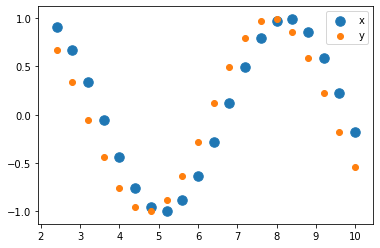

In [42]:
pl.scatter(data_time_steps[1:], x.data.numpy(), s = 90,label = "x")
pl.scatter(data_time_steps[1:],  y.data.numpy(), label = "y")
pl.legend()
pl.show()

In [28]:
w1 = torch.FloatTensor(input_size,hidden_size).type(dtype)
init.normal(w1, 0.0, 0.4)
w1 = Variable(w1, requires_grad = True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad = True)

/home/dan/anaconda2/envs/tf2_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  
/home/dan/anaconda2/envs/tf2_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  """


In [29]:
def forward(input, context_state, w1, w2):
   xh = torch.cat((input, context_state), 1)
   context_state = torch.tanh(xh.mm(w1))
   out = context_state.mm(w2)
   return (out, context_state)

In [30]:
optimizer = optim.SGD([w1,w2], lr=lr, momentum=0.9)


In [34]:
for i in range(epochs):
   total_loss = 0
   context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = True)
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]

      (pred, context_state) = forward(input, context_state, w1, w2)
      loss = (pred - target).pow(2).sum()/2

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      context_state = Variable(context_state.data)
   print("Epoch: {} loss {}".format(i, loss))

context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = False)
predictions = []

for i in range(x.size(0)):
   input = x[i:i+1]
   (pred, context_state) = forward(input, context_state, w1, w2)
   context_state = context_state
   predictions.append(pred.data.numpy().ravel()[0])

Epoch: 0 loss 0.020130038261413574
Epoch: 1 loss 0.019904689863324165
Epoch: 2 loss 0.019679805263876915
Epoch: 3 loss 0.01945524662733078
Epoch: 4 loss 0.019231006503105164
Epoch: 5 loss 0.019006984308362007
Epoch: 6 loss 0.01878276653587818
Epoch: 7 loss 0.01855855993926525
Epoch: 8 loss 0.01833406649529934
Epoch: 9 loss 0.018109282478690147
Epoch: 10 loss 0.01788398064672947
Epoch: 11 loss 0.017658129334449768
Epoch: 12 loss 0.01743163727223873
Epoch: 13 loss 0.017204267904162407
Epoch: 14 loss 0.016976160928606987
Epoch: 15 loss 0.0167470034211874
Epoch: 16 loss 0.016516925767064095
Epoch: 17 loss 0.016285616904497147
Epoch: 18 loss 0.016053184866905212
Epoch: 19 loss 0.015819495543837547
Epoch: 20 loss 0.015584420412778854
Epoch: 21 loss 0.015348060056567192
Epoch: 22 loss 0.015110097825527191
Epoch: 23 loss 0.01487089041620493
Epoch: 24 loss 0.014630011282861233
Epoch: 25 loss 0.014387683011591434
Epoch: 26 loss 0.014143813401460648
Epoch: 27 loss 0.013898361474275589
Epoch: 28 l

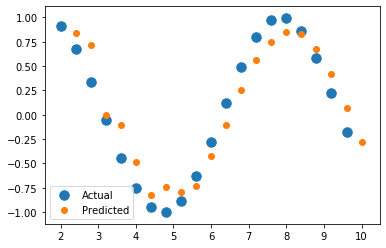

In [32]:
pl.scatter(data_time_steps[:-1], x.data.numpy(), s = 90, label = "Actual")
pl.scatter(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.show()